In [4]:
import pandas as pd 

FILE = 'C:\\Users\\Prime\\Google Drive\\SBU\Fall 18\\CSE 519\\Project\\CSE-519-Project\\Data\\all_data.csv'
df = pd.DataFrame.from_csv(FILE)
df.content = df.content.str.replace('/',' ') 
df.content = df.content.str.replace(',',' ') 
df.content = df.content.str.replace('(',' ')
df.content = df.content.str.replace(')',' ') 
df.content = df.content.str.replace('"','\'') 
df.category = df.category.str.lower() 

C:\Users\Prime\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  after removing the cwd from sys.path.


In [253]:
a = df.groupby('category')['content'].count().reset_index()

In [254]:
a.columns = ['category','count all']
print(a.columns)
print(a.head())

Index(['category', 'count all'], dtype='object')
   category  count all
0       aod       1735
1       aoi       9288
2       aoo      95754
3  auctions     214512
4      bids      76483


In [255]:
b = df.groupby('category')['content'].nunique().reset_index()

In [256]:
b.columns = ['category','count unique']
print(b.columns)
print(b.head())

Index(['category', 'count unique'], dtype='object')
   category  count unique
0       aod           758
1       aoi          3921
2       aoo         37247
3  auctions         94485
4      bids         43534


In [257]:
a = a.merge(b, on='category')

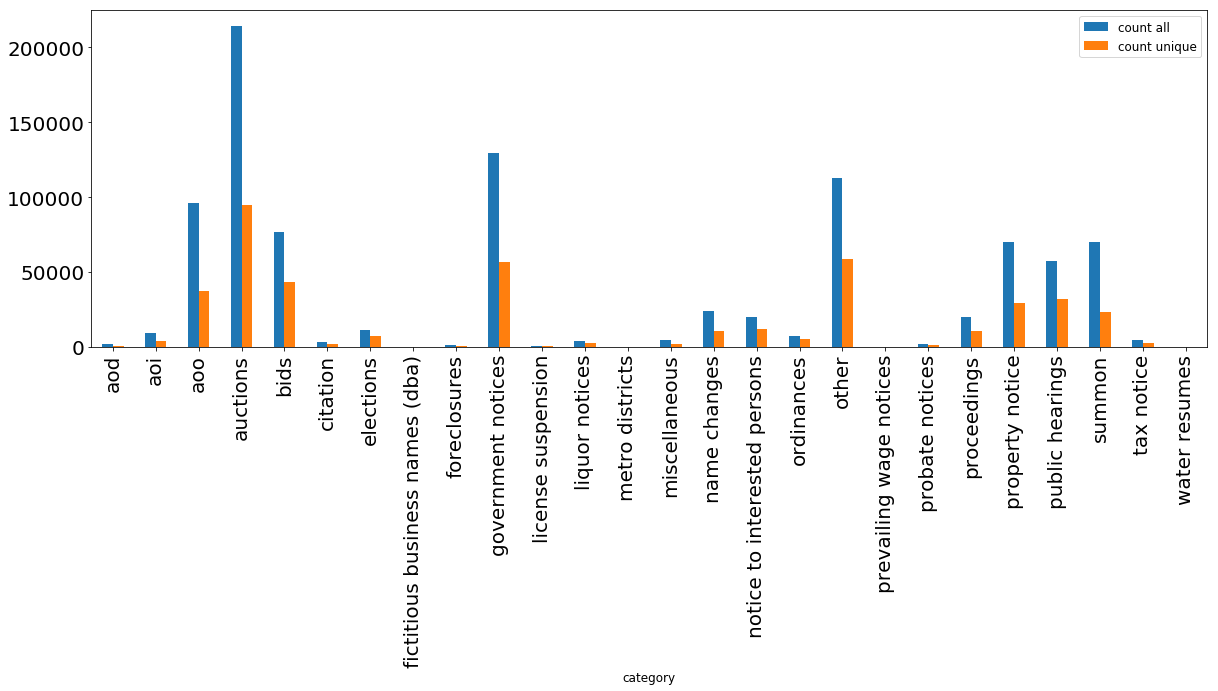

In [261]:
a.plot(x="category", y=["count all", "count unique"], kind="bar", figsize=(20,6), fontsize=20)

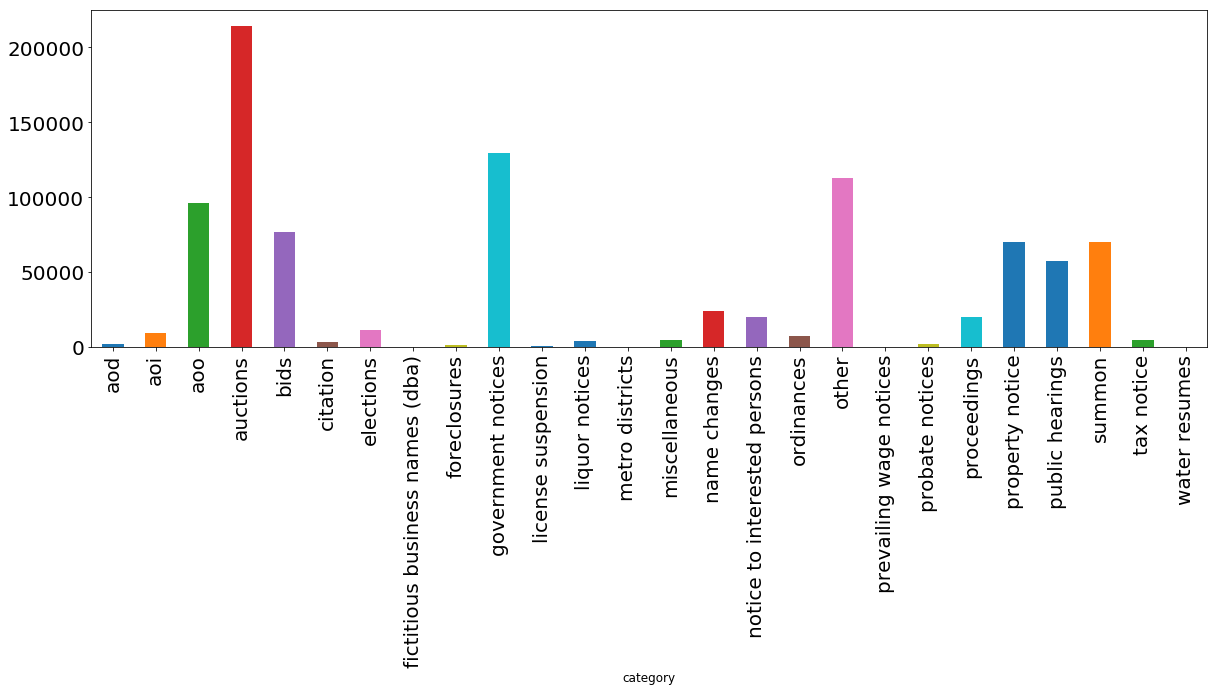

937046


In [116]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,6))
df.groupby('category')['content'].count().plot.bar(ylim=0)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()
print(len(df))

In [238]:
df_filter = df[df.category=='summon']
print(len(df_filter))

70020


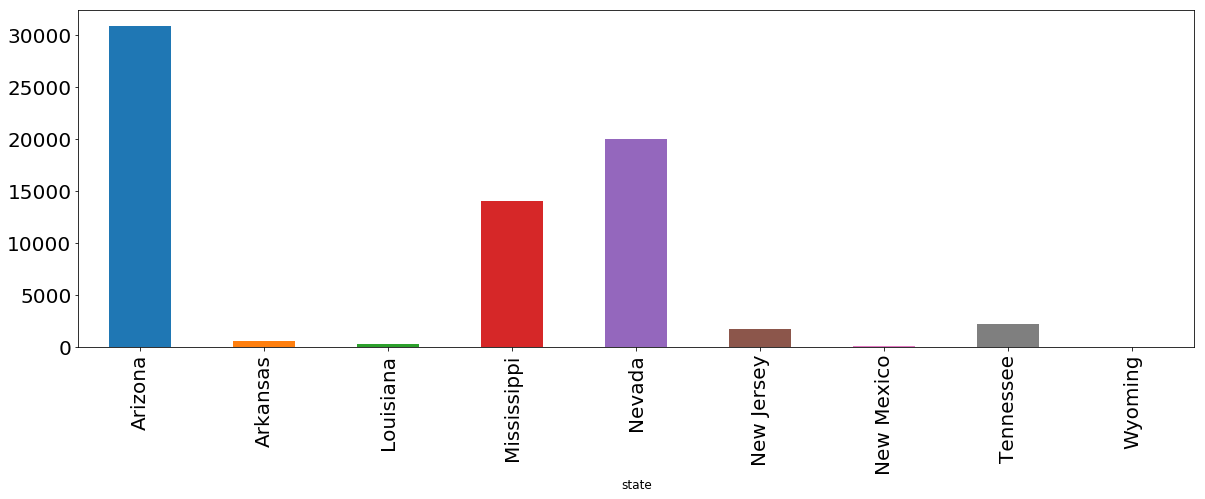

In [239]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,6))
df_filter.groupby('state')['content'].count().plot.bar(ylim=0)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [240]:
print(len(df_filter))
df_filter.head()

70020


,category,content,county,date,month,newspaper,state,year
78494,summon,in the chancery court of pearl river county m...,Pearl River,2017/02/24,2,Picayune Item,Mississippi,2017
78498,summon,in the chancery court of pearl river county m...,Pearl River,2017/02/24,2,Picayune Item,Mississippi,2017
78500,summon,in the chancery court of pearl river county m...,Pearl River,2017/02/24,2,Picayune Item,Mississippi,2017
78543,summon,in the chancery court of warren county miss...,Warren,2017/02/24,2,Vicksburg Post,Mississippi,2017
78575,summon,in the chancery court of lauderdale county in...,Lauderdale,2017/02/24,2,Meridian Star,Mississippi,2017


In [241]:
proposals = {}
cnt = 0
KEY = 'claims'

for i,content in enumerate(df_filter.content.values):
    content = content.replace('  ',' ')
    #if i==20: break
    #print(content)
    if KEY in content:
        p = ' '.join(content[content.find(KEY):content.find(KEY)+100].split()[:7])
        proposals[p] = proposals.get(p, 0) + 1
        #print(p)
        cnt+=1
    #else:
        #print(content)
print(cnt)

535


In [234]:
results = []
sorted_by_value = sorted(proposals.items(), key=lambda kv: kv[1], reverse=True)

for k in sorted_by_value[:10]:
    #print(k[0] , proposals[k[0]])
    results.append(k)
    
    
r = pd.DataFrame(results)
r.columns = ['phrase', 'count']
#r = r.columns()
r.head(10)

,phrase,count
0,claims matured or unmatured against the estate,17460
1,claims against the estate are required to,15666
2,claims against said estate to present the,3659
3,claims against this estate are required to,2708
4,claims matured or unmatured against his or,2286
5,claims against the estate must exhibit them,2084
6,claims against said estate are required to,1481
7,claims against the estate must be presented,1459
8,claims matured or unmatured against said estate,1342
9,claims matured or unmatured against this estate,1077


In [152]:
# for r in results[:50]:
#     print(r)

(-0.5, 1599.5, 799.5, -0.5)

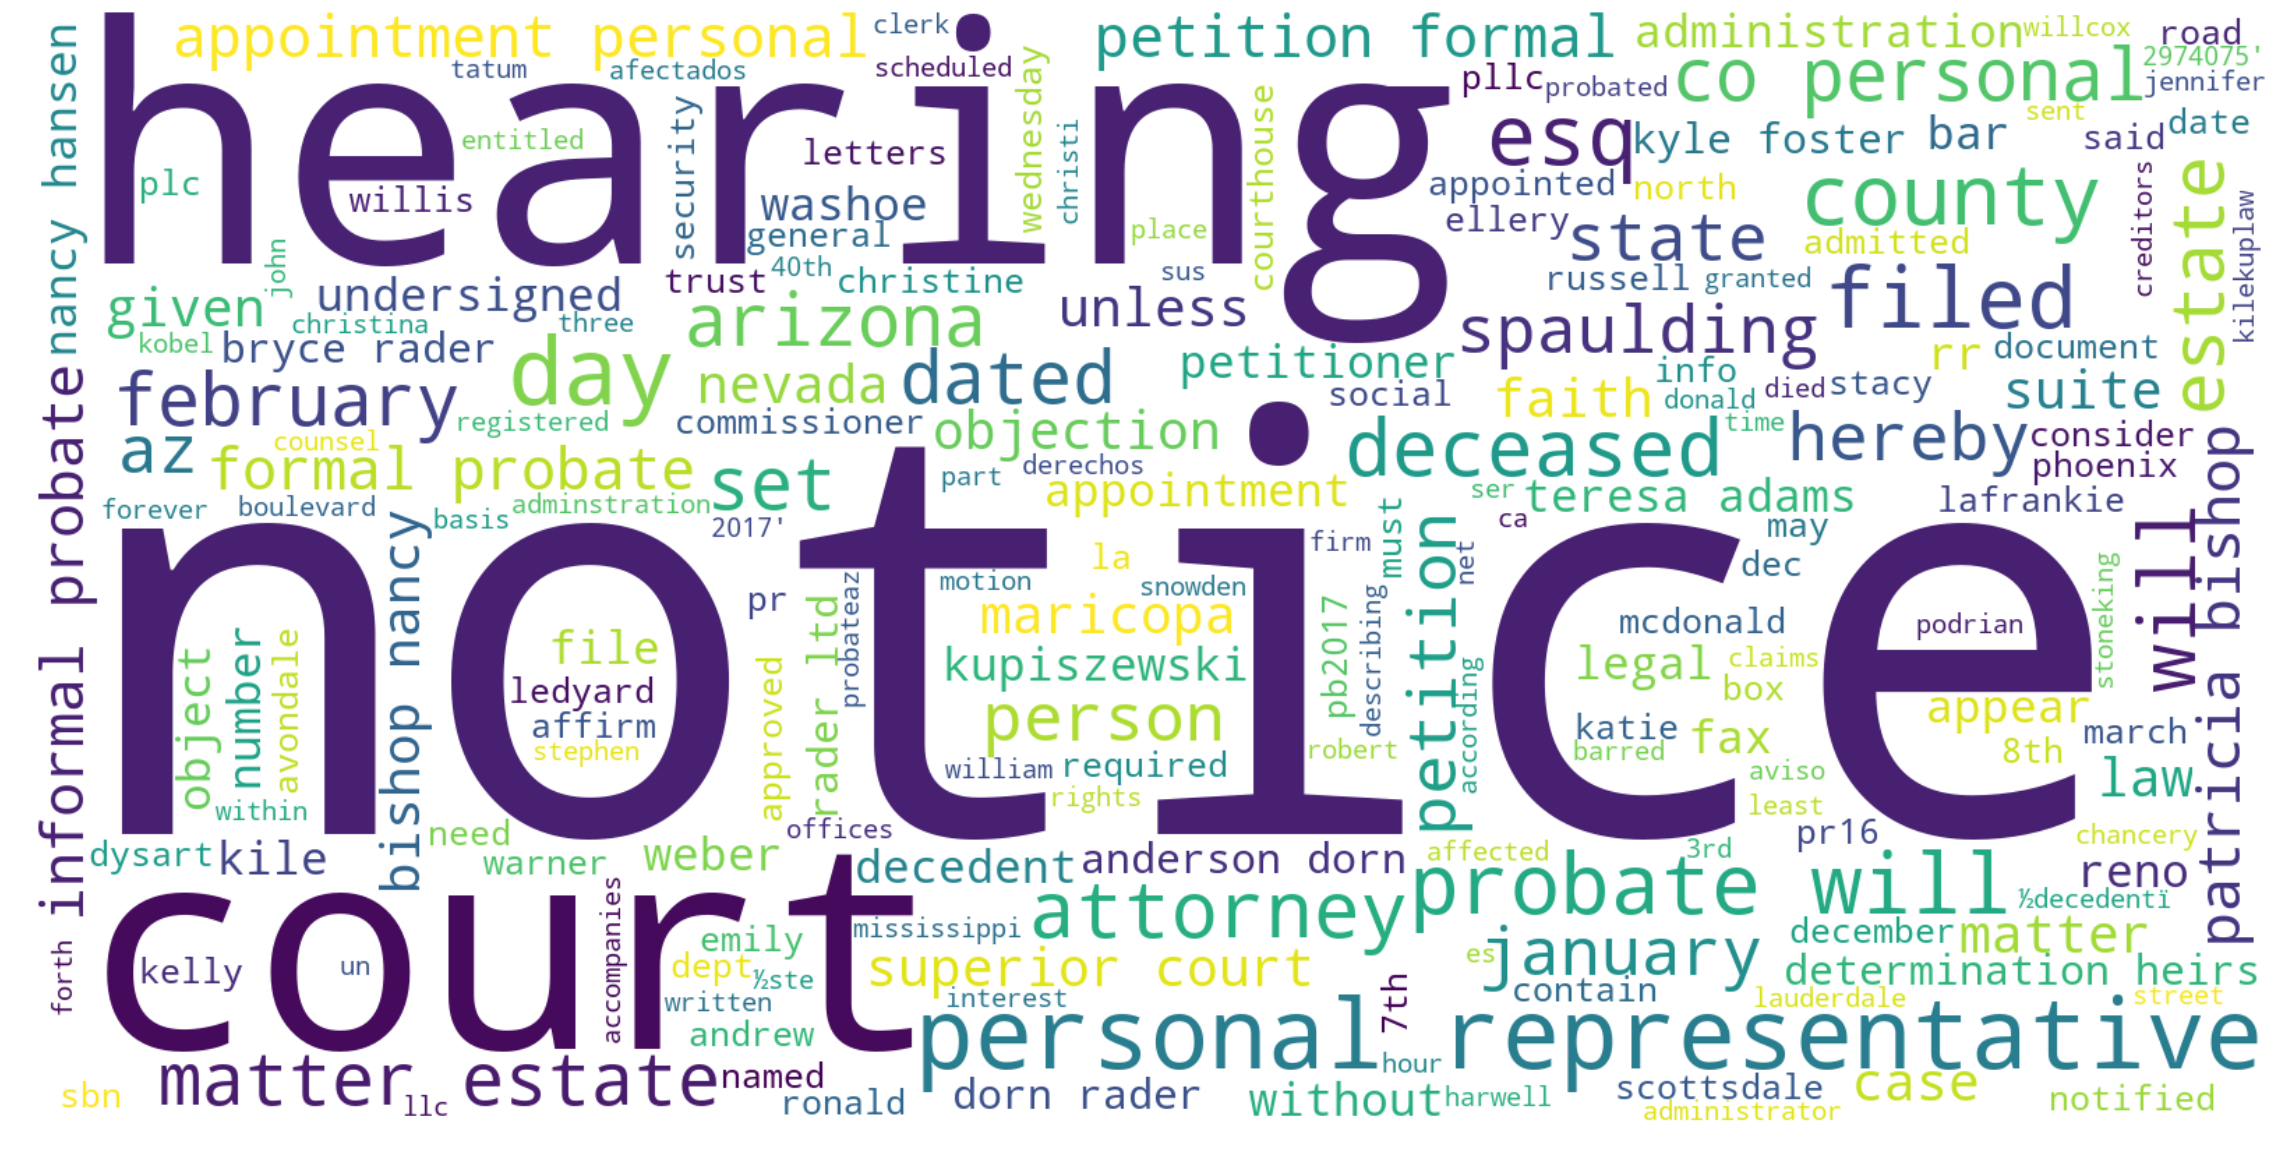

In [185]:
# the matplotlib way:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

#wordcloud = WordCloud(width=1600, height=800, stopwords=stopwords)
#wordcloud.generate_from_frequencies(frequencies=word_freq)
text = df_filter.content.values
#text = results
wordcloud = WordCloud(width=1600, 
                      height=800,
                      background_color='white',
                      stopwords=stopwords,
                      max_words=200,
                      random_state=42
                      ).generate(str(text))

mpl.rcParams['figure.figsize']=(40.0,30.0)    #(6.0,4.0)
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=3000             #72 
mpl.rcParams['figure.subplot.bottom']=.1 

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")